# Importing required packages

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# Reading and understanding data

In [2]:
data = pd.read_csv('segmentation data.csv', header='infer')

In [3]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


# Null values handling

In [6]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

#### There are no null values

# Visualising Data

### Heatmap

<Axes: >

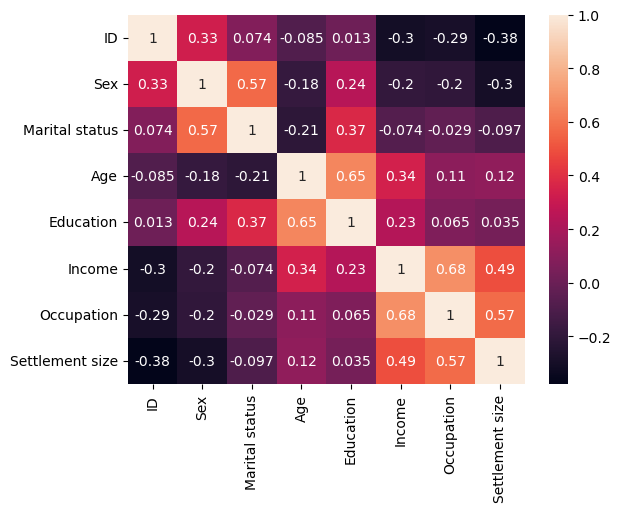

In [7]:
sns.heatmap(data.corr(), annot=True)

<h4>We can observe that there is high correlation between these pairs</h4>
<li>Marital Status, sex</li>
<li>Education, age</li>
<li>Occupation, income</li>
<li>settlement size, income</li>
<li>settlement size, occupation</li>

<h4>There is also a high negative correlation between: </h4>
<li>Age, Marital Status</li>

### Pairplot

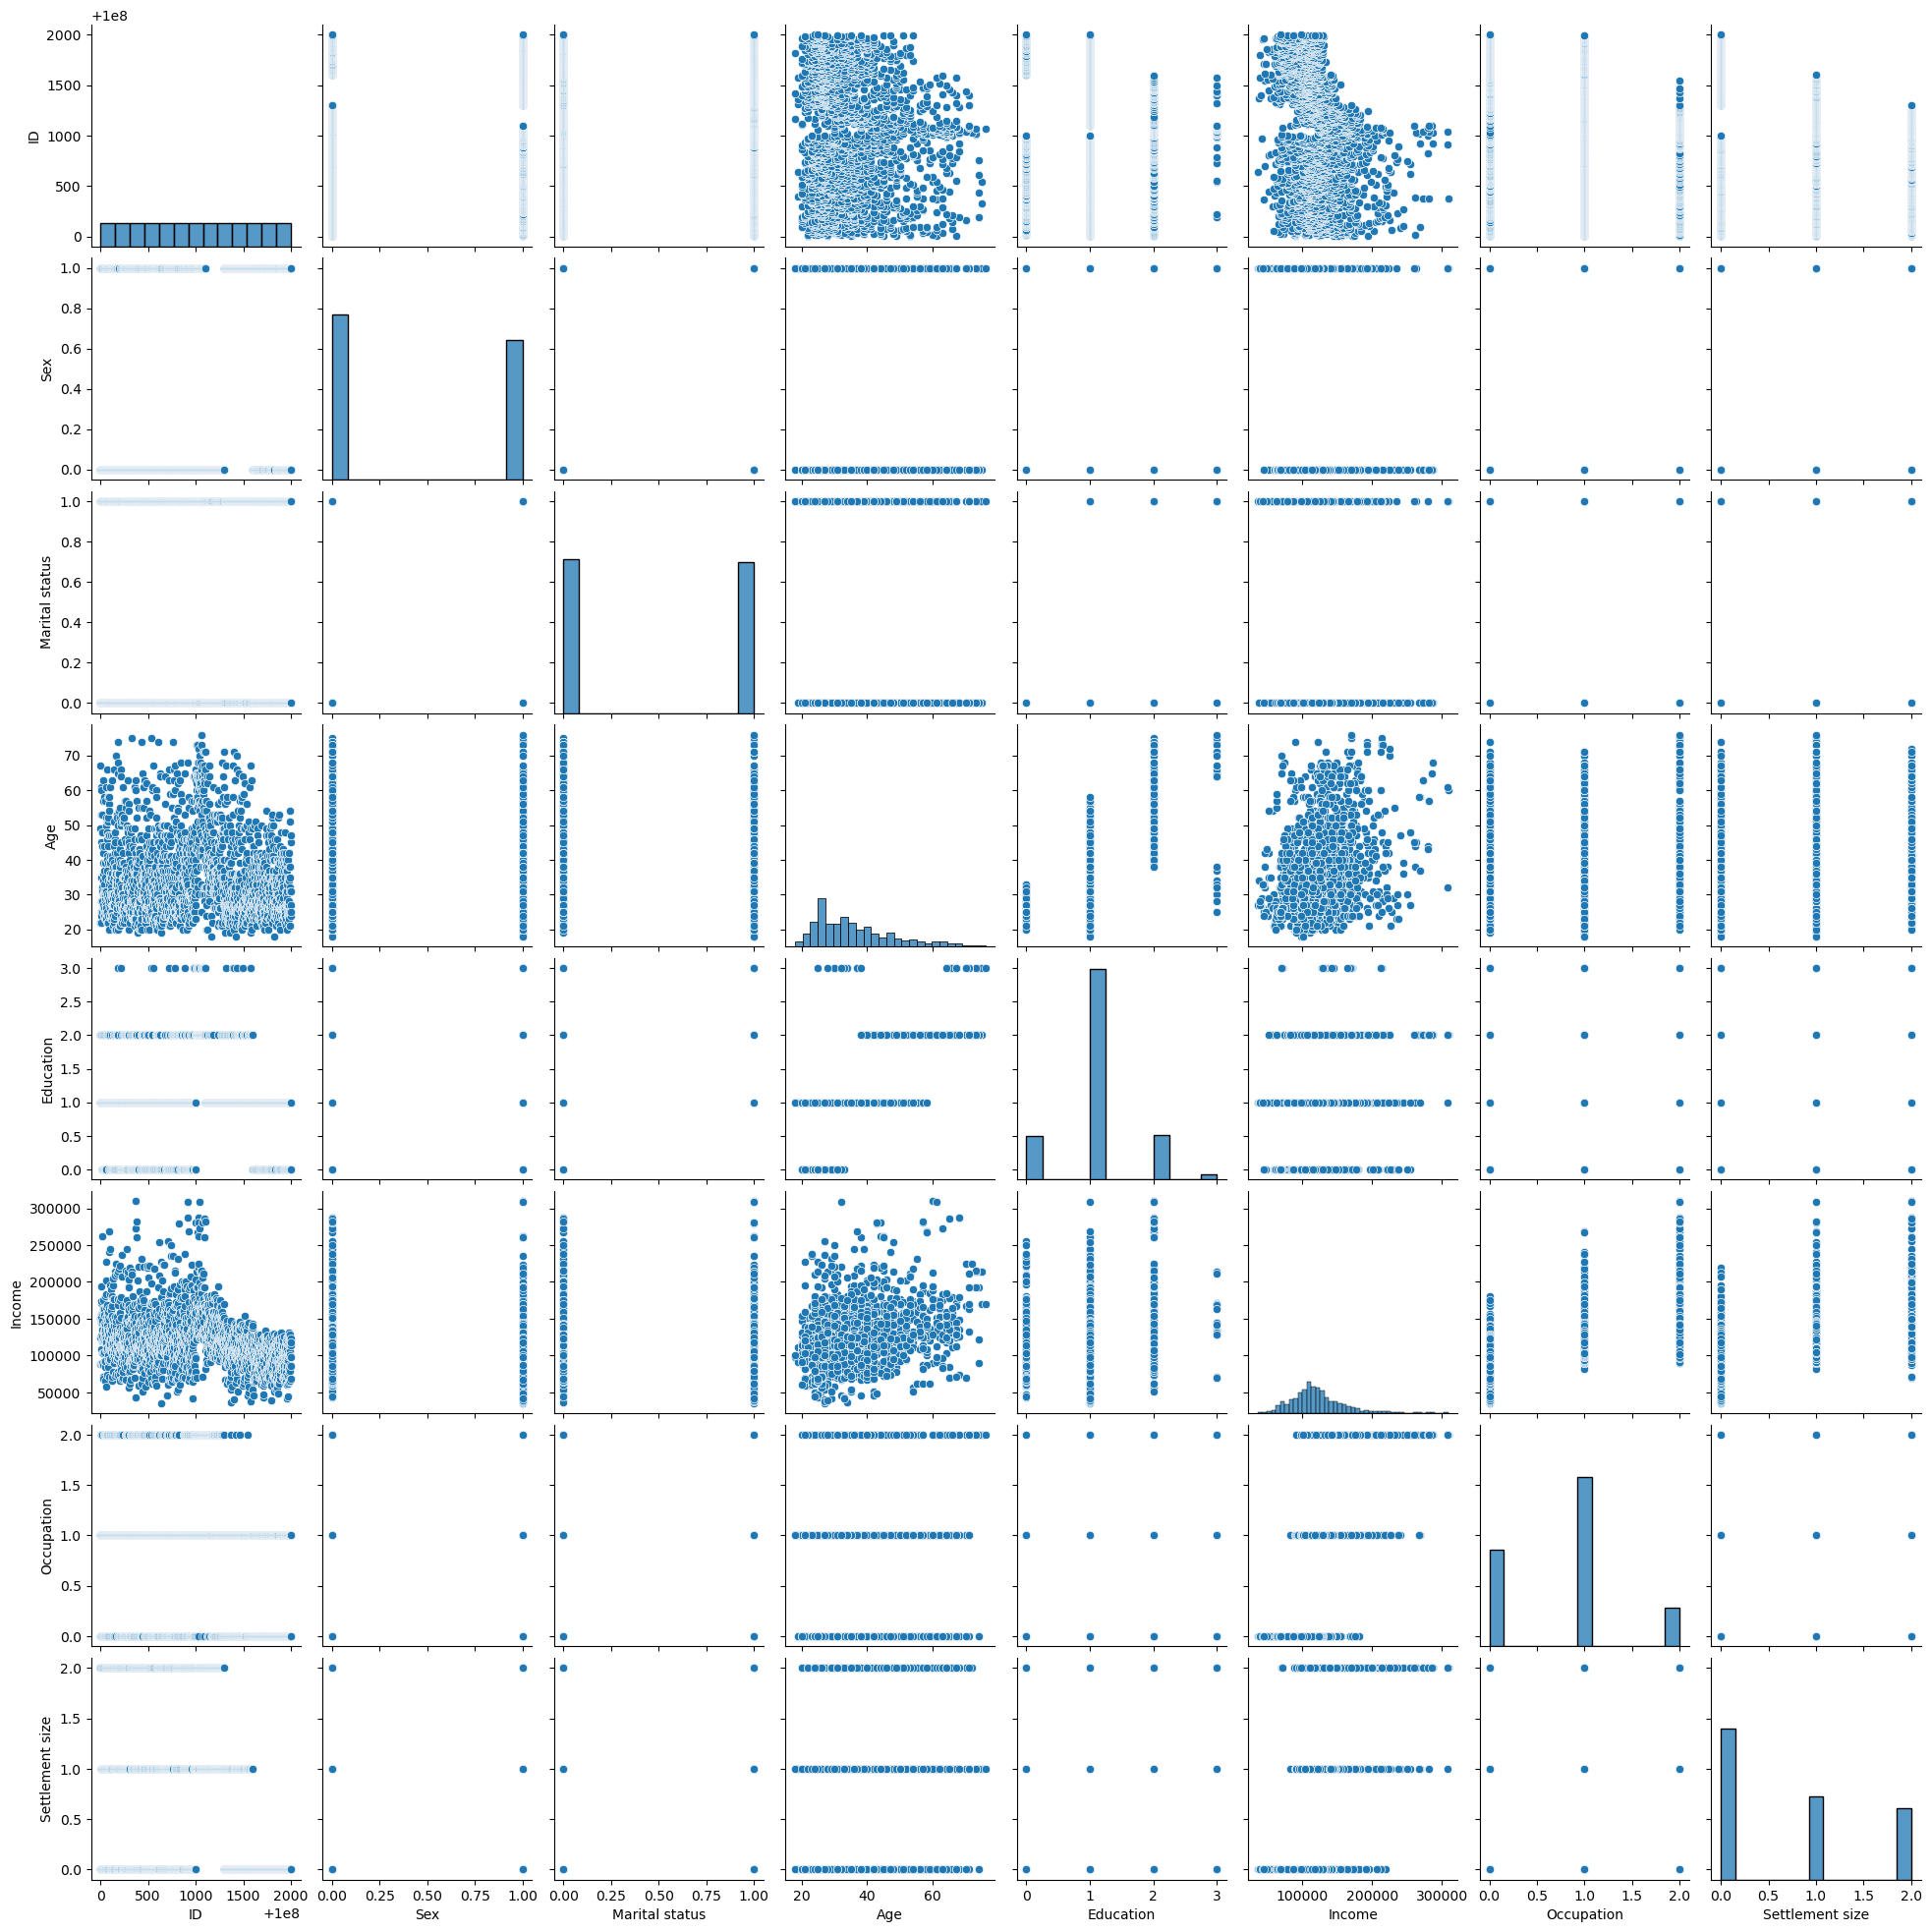

In [8]:
sns.pairplot(data)

<h4> We can infer the following points from this pairplot</h4>
<li> most people have the income between 50,000 to 150,000 </li>

### Boxplot

In [9]:
data.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

Uncategorized numerical columns from this dataset are age and income

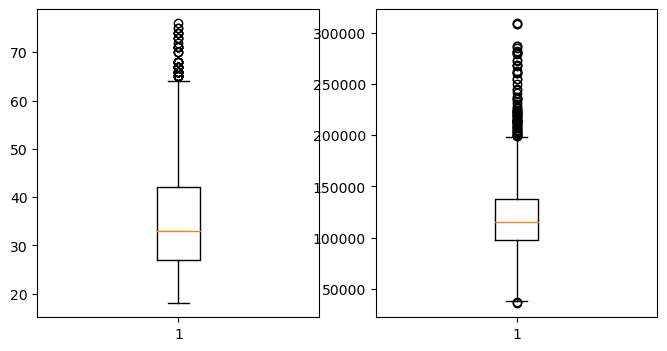

In [10]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.boxplot(data['Age'])
plt.subplot(122)
plt.boxplot(data['Income'])
plt.show()

#### There are too many outliers in these two categories. We need to remove them.

# Removing Outliers

In [11]:
from scipy.stats import zscore

In [12]:
z_scores = zscore(data['Age'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
data = data[(z_scores <= 3) & (z_scores >= -3)]

In [13]:
z_scores = zscore(data['Income'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
data = data[(z_scores <= 3) & (z_scores >= -3)]

In [14]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,1.958000e+03,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,1.000010e+08,0.460674,0.499489,35.530644,1.024515,118277.183861,0.789581,0.724208
std,5.798969e+02,0.498578,0.500127,11.284894,0.587218,33104.213185,0.624531,0.810342
min,1.000000e+08,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.000000,97324.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.000000,114807.000000,1.000000,0.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.000000,136135.750000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,71.000000,3.000000,231992.000000,2.000000,2.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               1958 non-null   int64
 1   Sex              1958 non-null   int64
 2   Marital status   1958 non-null   int64
 3   Age              1958 non-null   int64
 4   Education        1958 non-null   int64
 5   Income           1958 non-null   int64
 6   Occupation       1958 non-null   int64
 7   Settlement size  1958 non-null   int64
dtypes: int64(8)
memory usage: 137.7 KB


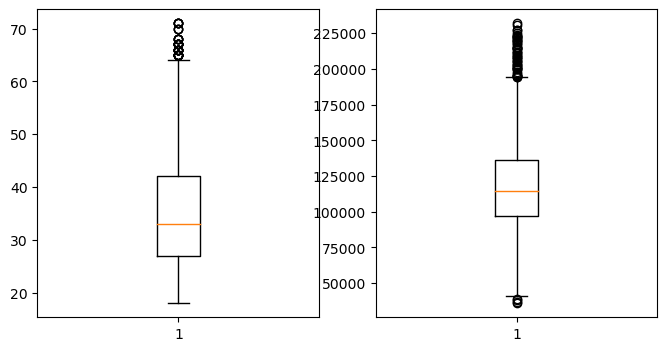

In [16]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.boxplot(data['Age'])
plt.subplot(122)
plt.boxplot(data['Income'])
plt.show()

# Feature Scaling

In [17]:
data.drop(['ID'], axis=1, inplace=True)
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
minmax = MinMaxScaler()
columns = data.columns
data = pd.DataFrame(minmax.fit_transform(data), columns=columns)

# Unsupervised model for clustering

In [20]:
from sklearn.cluster import KMeans
from scipy import spatial

#### Elbow method to find the best number of clusters

In [21]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\raman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raman\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\raman\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\raman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

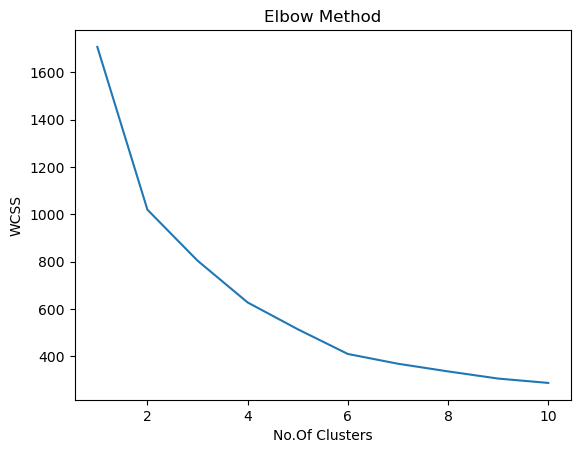

In [22]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No.Of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Since the curve has three bends: (0-2, 2-6, 6-10) we will take three clusters

In [23]:
km_model = KMeans(n_clusters = 3, init='k-means++', random_state= 42)

In [24]:
ykmeans = km_model.fit_predict(data)

C:\Users\raman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.924528,0.666667,0.452885,0.5,1.0
1,1.0,1.0,0.075472,0.333333,0.585955,0.5,1.0
2,0.0,0.0,0.584906,0.333333,0.272115,0.0,0.0
3,0.0,0.0,0.509434,0.333333,0.691950,0.5,0.5
4,0.0,0.0,0.660377,0.333333,0.577075,0.5,0.5


In [26]:
data['kclus'] = pd.Series(ykmeans)

In [27]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kclus
0,0.0,0.0,0.924528,0.666667,0.452885,0.5,1.0,1
1,1.0,1.0,0.075472,0.333333,0.585955,0.5,1.0,0
2,0.0,0.0,0.584906,0.333333,0.272115,0.0,0.0,2
3,0.0,0.0,0.509434,0.333333,0.691950,0.5,0.5,1
4,0.0,0.0,0.660377,0.333333,0.577075,0.5,0.5,1


In [28]:
data['kclus'].unique()

array([1, 0, 2])

We have successfully divided the model into three categories. Now we need a supervised model to understand the trends and categorize the future/test data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = data.drop(columns = ['kclus'], axis = 1)
y = data['kclus']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1566, 7) (392, 7) (1566,) (392,)


# Supervised model building for classification

We are going to try four different models and select the best one out of all four

In [33]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [34]:
rand_model = RandomForestClassifier()
tree_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()
adb_model = AdaBoostClassifier()

In [35]:
rand_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
adb_model.fit(X_train, y_train)

AdaBoostClassifier()

In [36]:
rand_pred = rand_model.predict(X_train)
tree_pred = tree_model.predict(X_train)
xgb_pred = xgb_model.predict(X_train)
adb_pred = adb_model.predict(X_train)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
# Test Scores
scores = {'Random Forest': accuracy_score(rand_pred, y_train), 'Decision Tree': accuracy_score(tree_pred, y_train), 'XGBoost': accuracy_score(xgb_pred, y_train), 'Adaboost': accuracy_score(adb_pred, y_train)}
test_scores = pd.DataFrame([scores])
print(test_scores)

   Random Forest  Decision Tree  XGBoost  Adaboost
0            1.0            1.0      1.0  0.787356


In [39]:
rand_pred = rand_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
adb_pred = adb_model.predict(X_test)

In [40]:
# Validation Scores

scores = {'Random Forest': accuracy_score(rand_pred, y_test), 'Decision Tree': accuracy_score(tree_pred, y_test), 'XGBoost': accuracy_score(xgb_pred, y_test), 'Adaboost': accuracy_score(adb_pred, y_test)}
valid_scores = pd.DataFrame([scores])
print(valid_scores)

   Random Forest  Decision Tree  XGBoost  Adaboost
0            1.0            1.0      1.0  0.818878


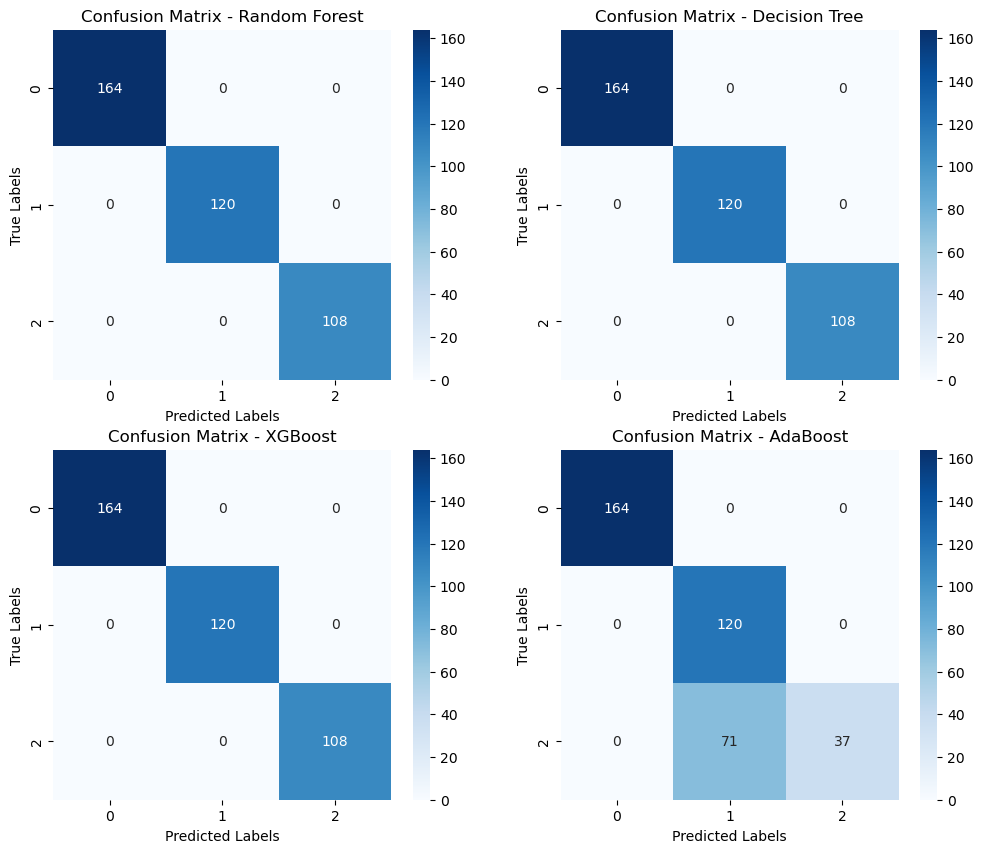

In [41]:
# Confusion Matrices
rand_conf_matrix = confusion_matrix(y_test, rand_pred)
tree_conf_matrix = confusion_matrix(y_test, tree_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)
adb_conf_matrix = confusion_matrix(y_test, adb_pred)

conf_matrices = [rand_conf_matrix, tree_conf_matrix, xgb_conf_matrix, adb_conf_matrix]
model_names = ['Random Forest', 'Decision Tree', 'XGBoost', 'AdaBoost']

# Plotting the matrices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(conf_matrices[i], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'Confusion Matrix - {model_names[i]}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

In [42]:
# Classification Reports
rand_classification_report = classification_report(y_test, rand_pred)
tree_classification_report = classification_report(y_test, tree_pred)
xgb_classification_report = classification_report(y_test, xgb_pred)
adb_classification_report = classification_report(y_test, adb_pred)

# Print classification reports
print("Classification Report - Random Forest:\n", rand_classification_report)
print("Classification Report - Decision Tree:\n", tree_classification_report)
print("Classification Report - XGBoost:\n", xgb_classification_report)
print("Classification Report - AdaBoost:\n", adb_classification_report)

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       108

    accuracy                           1.00       392
   macro avg       1.00      1.00      1.00       392
weighted avg       1.00      1.00      1.00       392

Classification Report - Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       108

    accuracy                           1.00       392
   macro avg       1.00      1.00      1.00       392
weighted avg       1.00      1.00      1.00       392

Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1   

# Hyperparameter tuning for Adaboost

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ,1.0],
    'estimator': [None, DecisionTreeClassifier(max_depth=1)],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(adb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_adaboost = AdaBoostClassifier(**best_params)
best_adaboost.fit(X_train, y_train)

# Predictions
y_pred = best_adaboost.predict(X_test)

# Model performance
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'estimator': None, 'learning_rate': 0.9, 'n_estimators': 4}
Accuracy on Test Set: 0.8188775510204082


#### Since all the previous models are overfitting, we will use parameter tuned adaboost for our model

In [45]:
adaboost_model = AdaBoostClassifier(estimator=None, learning_rate=0.9, n_estimators=4)

In [46]:
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.9, n_estimators=4)

In [47]:
adaboost_test = adaboost_model.predict(X_train)
adaboost_valid = adaboost_model.predict(X_test)

In [48]:
# Accuracy Scores
scores = {'Testing Accuracy': accuracy_score(adaboost_test, y_train), 'Validation Accuracy': accuracy_score(adaboost_valid, y_test)}
valid_scores = pd.DataFrame([scores])
print(valid_scores)

   Testing Accuracy  Validation Accuracy
0          0.787356             0.818878


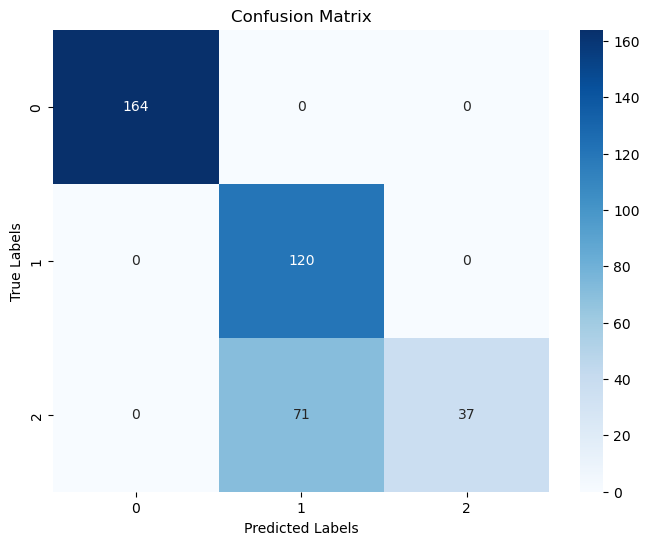

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, adaboost_valid)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [50]:
# Classification Report
print(classification_report(y_test, adaboost_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       0.63      1.00      0.77       120
           2       1.00      0.34      0.51       108

    accuracy                           0.82       392
   macro avg       0.88      0.78      0.76       392
weighted avg       0.89      0.82      0.80       392



### We can conclude that the Adaboost model generalized enough for the outside data. Hence we'll choose Adaboost model

In [51]:
import pickle
pickle.dump(adaboost_model, open('Flask/adbmodel.pkl', 'wb'))
pickle.dump(minmax, open('Flask/scaler.pkl', 'wb'))